In [101]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [102]:
SEED = 1200
np.random.seed(SEED)

In [103]:
class RandomWeight:
    def __init__(self, mean, standard_deviation):
        self.mean = mean
        self.standard_deviation = standard_deviation

    def sample(self):
        return np.random.normal(loc = self.mean, scale = self.standard_deviation)

In [104]:
def plot_graph(graph):
    # Disegna il grafo
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph, seed=SEED)  # Layout per posizionare i nodi

    # Disegna i nodi e gli archi
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10, arrowsize=20)

    # Disegna le etichette degli archi
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color="red", font_size=10)

    plt.title("Grafo")
    plt.show()

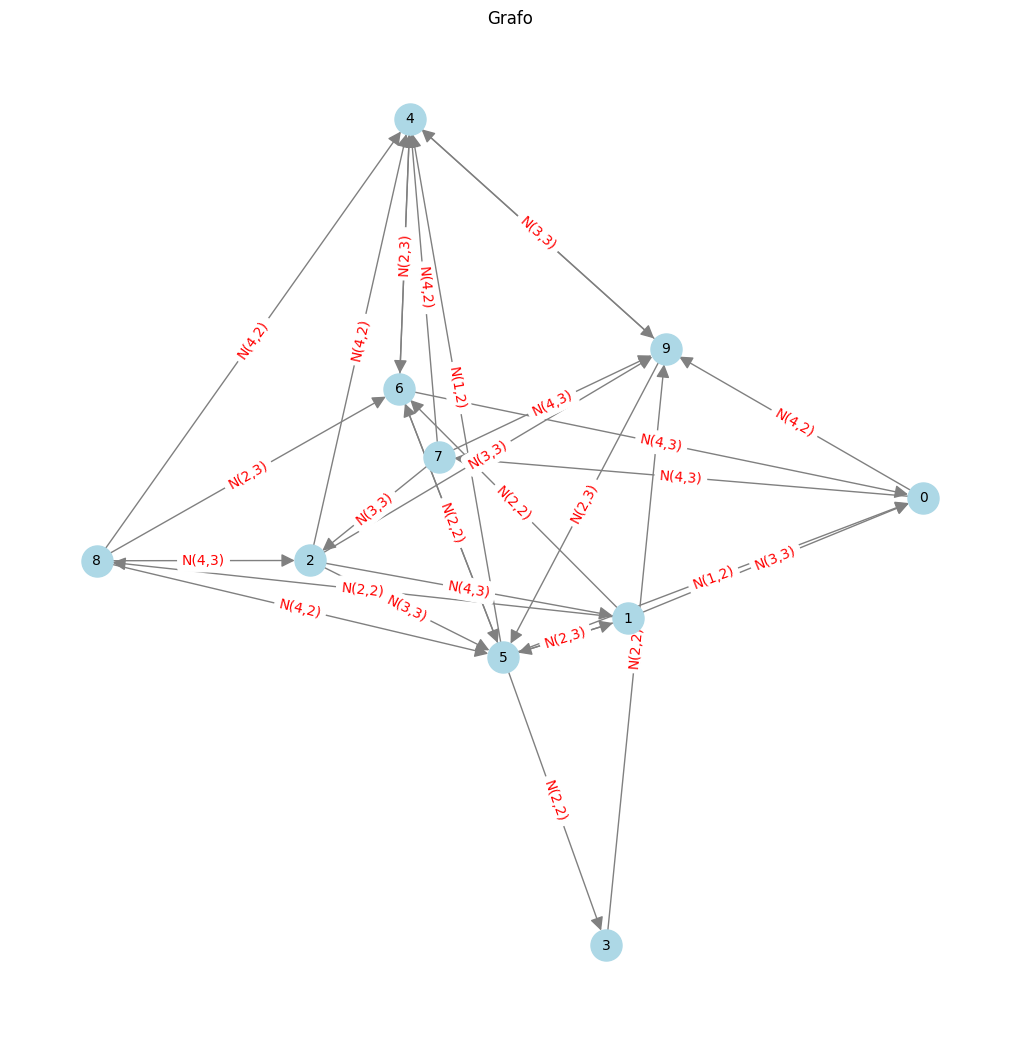

In [105]:
base_graph : nx.DiGraph =  nx.fast_gnp_random_graph(10, 0.3, seed= SEED, directed=True)
for u, v in base_graph.edges():
    # Assegna direzione casuale: da u a v o da v a u
    random_mean = np.random.randint(1,5)
    random_std = np.random.randint(2,4)
    base_graph[u][v]['label'] = f"N({random_mean},{random_std})"
    base_graph[u][v]['random_weight'] = RandomWeight(random_mean,random_std)
    
    #directed_G.add_edge(v, u, label=f"G({random_mean},{random_std})", random_weight= RandomWeight(random_mean,random_std))
        
plot_graph(base_graph)

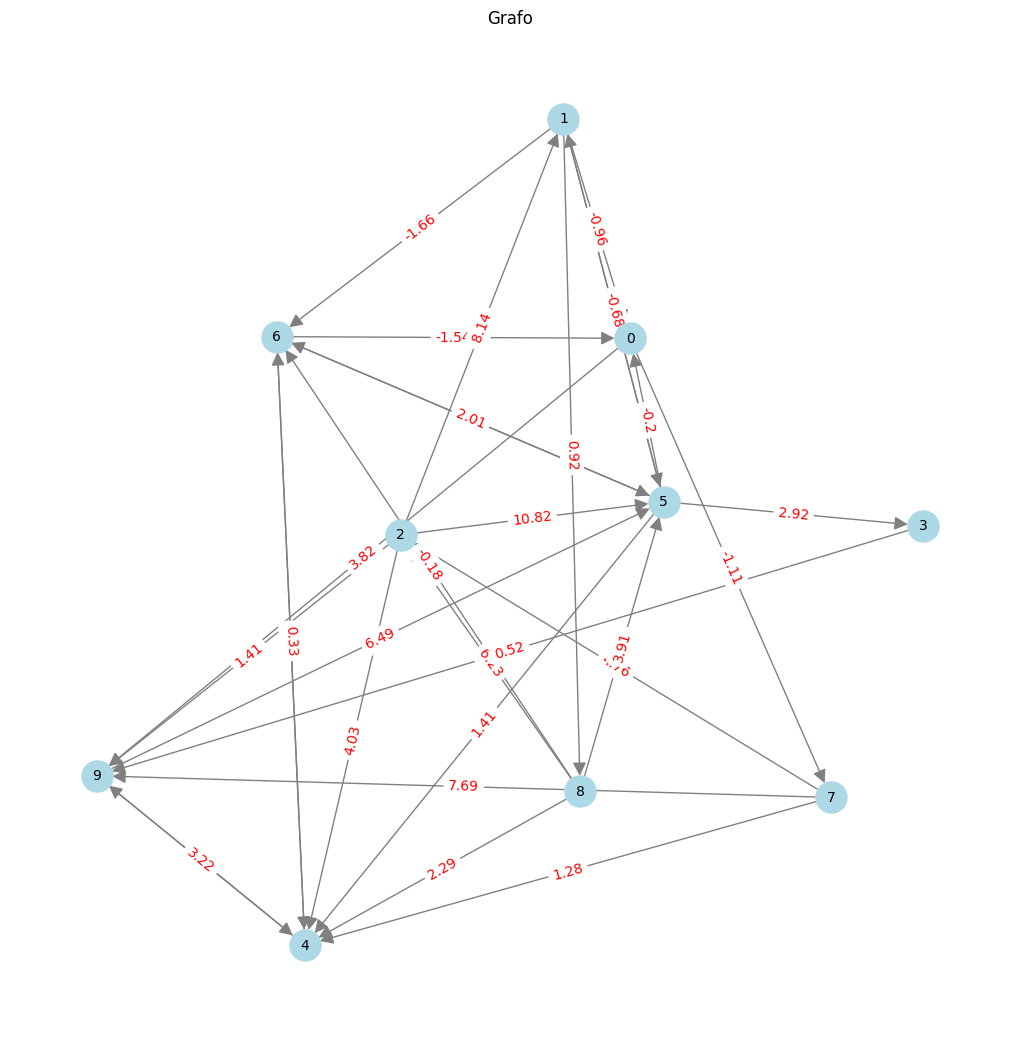

In [106]:
sample_graph = nx.DiGraph()
for u, v in base_graph.edges():
    sample = base_graph.get_edge_data(u,v)["random_weight"].sample()
    sample_graph.add_edge(u, v, label=round(sample,2), random_weight= sample)

plot_graph(sample_graph)